# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


##Problem Definition


The Facial Emotion Detection is multiclass image classification where we need to predict the emotional state of a human out of a Grayscale dataset.  There are four classes: “happy”, “sad”, “Neutral”, ”surprise”
In mental health care, especially In remote or teletherapy settings, therapists often face difficulty interpreting subtle facial expressions through video alone. These emotional cues, such as fleeting sadness or suppressed anxiety, are critical to understanding a patient’s psychological state but may go unnoticed during online sessions.

This project addresses the challenge of accurately detecting facial emotions from grayscale images using deep learning. The goal is to build and evaluate models that can identify emotions such as happy, sad, neutral, and surprise — even when visual data is limited or variable.

	I built  a model  with good performance in order to detect the current feelings of a mental health patient along a Teletherapy Session with psychologist or psychiatrist.
I did this with several limitations and challenges:
1. small dataset.
2. images and not video
3. Graysacle
4.peple cam have seceral emotions at the sme time and I have only 4 classes
5.The are differences between cultures and individuals in terms of
facial expressions




## Executive Summary
This project focuses on building an AI-based facial emotion recognition system to support mental health professionals during teletherapy sessions. Several deep learning models were developed and tested, including transfer learning and custom convolutional neural networks (CNNs), using grayscale facial images.
The complex CNN model, consisting of 5 convolutional layers, achieved the highest overall accuracy (82%) and the best recall for the 'sad' emotion class (69%), which is critical for detecting signs of depression or anxiety. Techniques such as data augmentation, Leaky ReLU activations, and dropout were applied to improve generalization and performance on imbalanced data.
The final model is suitable for integration into teletherapy platforms, offering real-time emotional feedback and session summaries, helping therapists gain deeper insights into patient well-being.


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU, Input,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from tensorflow.keras.applications import ResNet50V2
from sklearn.metrics import confusion_matrix
import os
from tensorflow.keras.preprocessing.image import load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
import zipfile

zip_path = "/content/drive/My Drive/Facial_emotion_images.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/unzipped")

In [4]:
picture_size = 48
folder_path = "/content/unzipped/Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

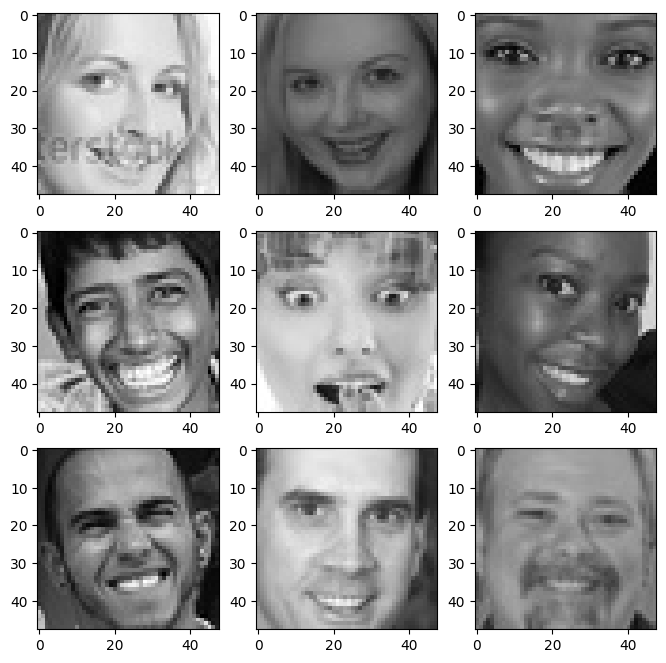

In [5]:
# first 9 images of happy
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:_1. deeper lines below the chicks
2. more V shape mouth- because of the smile_**

### **Sad**

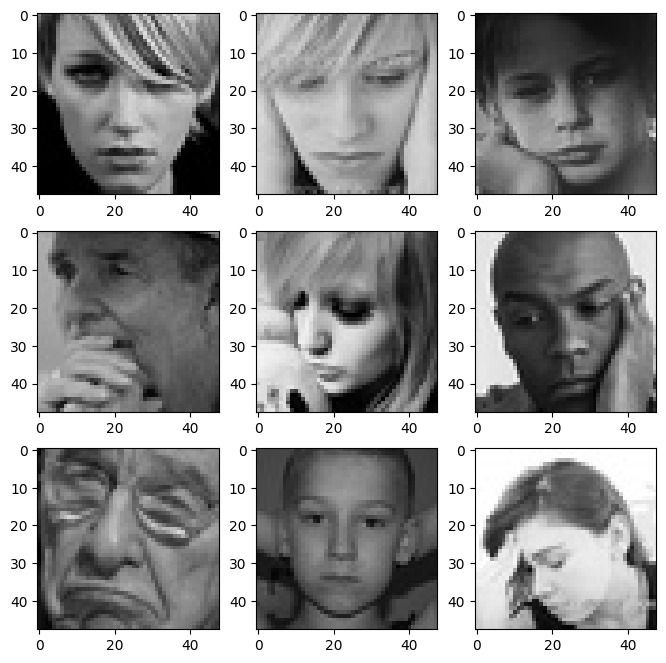

In [6]:
# first 9 images of sad
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:_1. head tilt down
2. closed mouth
3. Forehead wrinkles_**

### **Neutral**

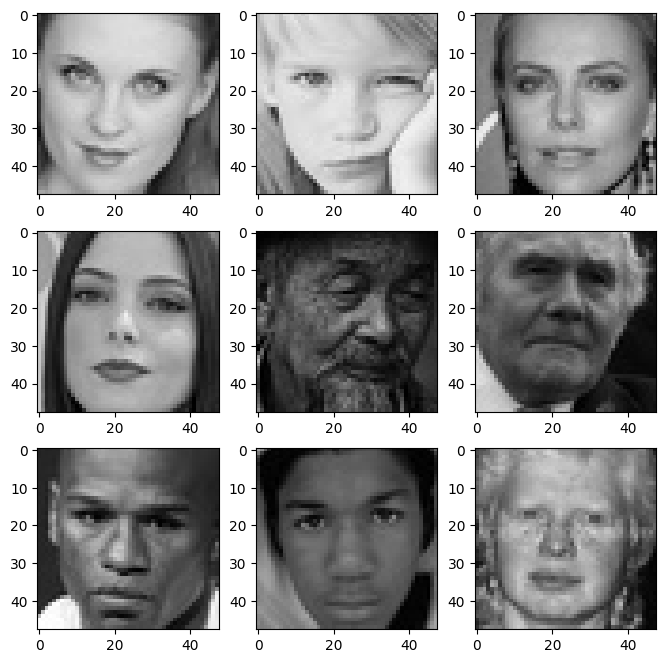

In [7]:

expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:1._no wrinkles
2.  closed mouth_**

### **Surprised**

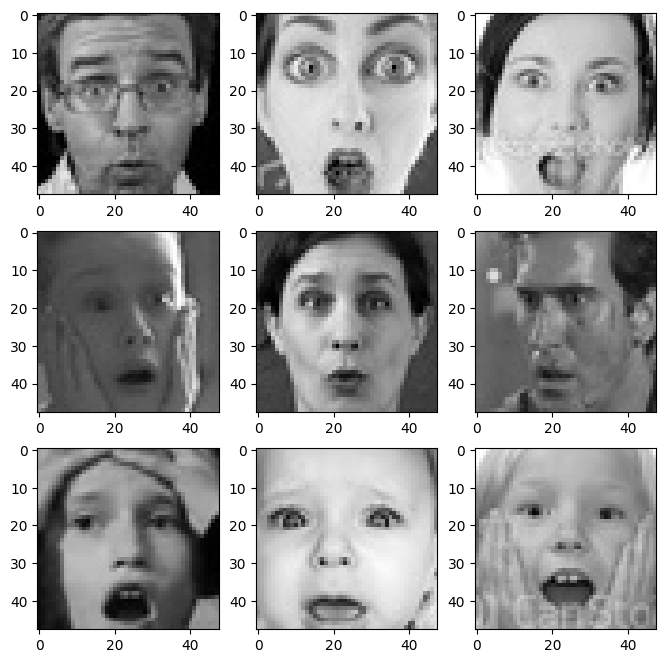

In [8]:
# first 9 images of suprised
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:_1. open mouth, circle shape
2.Raised eyebrows_**

## **Checking Distribution of Classes**

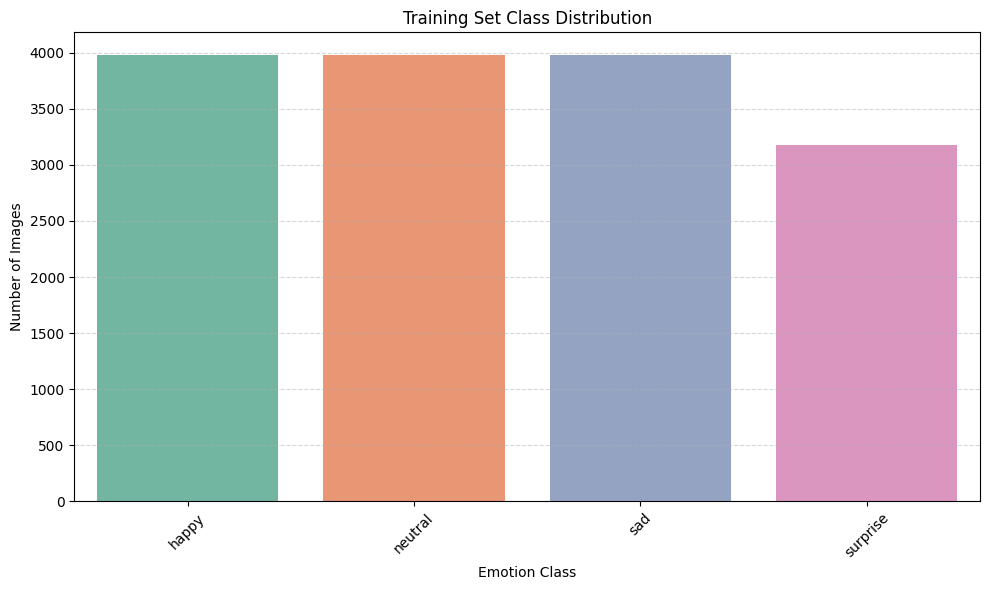

In [9]:
# Path to training data
train_path = folder_path + "train/"

# Collect class labels for each image
labels = []
for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)
    if os.path.isdir(class_folder):
        image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        labels.extend([class_name] * len(image_files))

# Create a DataFrame of labels
df = pd.DataFrame({'class': labels})

# Plot using seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', order=sorted(df['class'].unique()), palette='Set2')
plt.title('Training Set Class Distribution')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
#checking the IR of the training:
from collections import Counter

counts = Counter(df['class'])
major = max(counts.values())
minor = min(counts.values())
imbalance_ratio = major / minor
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 1.25


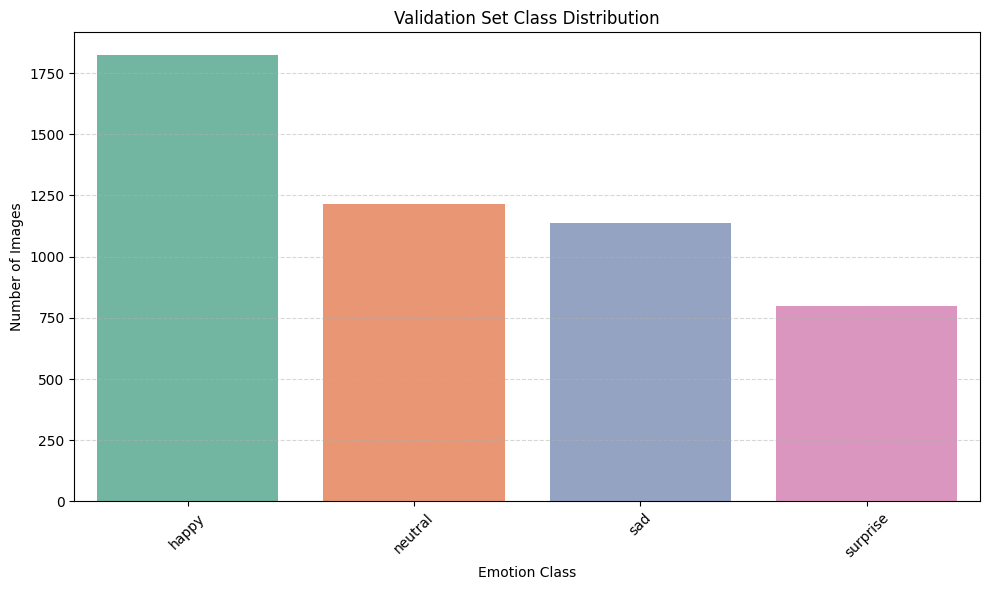

In [11]:
# Path to validation data
validation_path = folder_path + "validation/"

# Collect class labels for each image
labels = []
for class_name in os.listdir(validation_path):
    class_folder = os.path.join(validation_path, class_name)
    if os.path.isdir(class_folder):
        image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        labels.extend([class_name] * len(image_files))

# Create a DataFrame of labels
df = pd.DataFrame({'class': labels})

# Plot using seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', order=sorted(df['class'].unique()), palette='Set2')
plt.title('Validation Set Class Distribution')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
from collections import Counter

counts = Counter(df['class'])
major = max(counts.values())
minor = min(counts.values())
imbalance_ratio = major / minor

print(f"Imbalance Ratio (IR): {imbalance_ratio:.2f}")

Imbalance Ratio (IR): 2.29


In [13]:
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_happy)

num_happy = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_happy)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3976
Number of images in the class 'surprise':    3173


In [14]:
num_happy = len(os.listdir(folder_path + "validation/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "validation/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "validation/neutral"))
print("Number of images in the class 'neutral':   ", num_happy)

num_happy = len(os.listdir(folder_path + "validation/surprise"))
print("Number of images in the class 'surprise':   ", num_happy)

Number of images in the class 'happy':    1825
Number of images in the class 'sad':    1139
Number of images in the class 'neutral':    1825
Number of images in the class 'surprise':    797


In [15]:
num_happy = len(os.listdir(folder_path + "test/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "test/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "test/neutral"))
print("Number of images in the class 'neutral':   ", num_happy)

num_happy = len(os.listdir(folder_path + "test/surprise"))
print("Number of images in the class 'surprise':   ", num_happy)

Number of images in the class 'happy':    32
Number of images in the class 'sad':    32
Number of images in the class 'neutral':    32
Number of images in the class 'surprise':    32


**Observations and Insights:

1._classes of train are not equally distributed - surprise only about 3,200 while the rest are 4,000_
But the IR is not big  - 1.25 so it is considered balanced.
imbalabce of the train may cause bias towards majority class


2. validation - IR = 2.29. it contributes to the fact that the accuracy of the validation is higher than the training. But there is another reason -the augmentation of the training. I checked and th F1 Score of surpeise is good- 87% so no problem

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [16]:
from tensorflow.keras import backend as K
K.clear_session()


In [17]:
#we need to seed before we start model:
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [18]:
#we need folder based loading:
batch_size  = 32
img_size = 48

#train with augmentation:
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   brightness_range=[0.8, 1.2], # not a large range of brightness- not to obscure key facial cues
                                    rescale=1./255,
                                    rotation_range=15,  # rotating the image bit- increse rovustnesss,  not too much, not to distort emotions
                                    width_shift_range=0.1,# face not in the center - right,left
                                    height_shift_range=0.1,# face not in the center - up, down
                                    zoom_range=0.1, # zoom in and out from the image
                                    shear_range=0.3) #slanting the image

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)# shuffle true for train


Found 15109 images belonging to 4 classes.


In [19]:
#validation and test without augmentation:
datagen_validation = ImageDataGenerator(
    rescale=1./255
)


validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for validation

datagen_test = ImageDataGenerator(
    rescale=1./255
)


test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for test


Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [20]:
model = Sequential()

# 1st Convolution Block
model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution Block
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution Block
model.add(Conv2D(128, (3, 3), activation='relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 emotion classes
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,036 (2.61 MB)

 Trainable params: 683,588 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

### **Compiling and Training the Model**

In [21]:
# creating callbacks:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # Stop if no improvement after 5 epochs
    restore_best_weights=True
)



from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)




from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [22]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
history =   model.fit(
            train_set,
            validation_data= validation_set,
            epochs=20,
            shuffle=True,
            batch_size=32,
            verbose=1,
            callbacks=[early_stop, checkpoint, reduce_lr]
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2763 - loss: 1.6476

473/473 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.2763 - loss: 1.6471 - val_accuracy: 0.3293 - val_loss: 1.9486 - learning_rate: 0.0010
Epoch 2/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2805 - loss: 1.3685

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.2805 - loss: 1.3685 - val_accuracy: 0.3132 - val_loss: 1.3386 - learning_rate: 0.0010
Epoch 3/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3259 - loss: 1.3446

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.3259 - loss: 1.3445 - val_accuracy: 0.3902 - val_loss: 1.2624 - learning_rate: 0.0010
Epoch 4/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3507 - loss: 1.3004

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.3507 - loss: 1.3003 - val_accuracy: 0.4663 - val_loss: 1.1785 - learning_rate: 0.0010
Epoch 5/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3745 - loss: 1.2721

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.3745 - loss: 1.2720 - val_accuracy: 0.4772 - val_loss: 1.1771 - learning_rate: 0.0010
Epoch 6/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3964 - loss: 1.2340

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.3964 - loss: 1.2339 - val_accuracy: 0.5495 - val_loss: 1.0721 - learning_rate: 0.0010
Epoch 7/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4174 - loss: 1.1899

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.4174 - loss: 1.1900 - val_accuracy: 0.5457 - val_loss: 1.0647 - learning_rate: 0.0010
Epoch 8/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4419 - loss: 1.1721

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.4419 - loss: 1.1721 - val_accuracy: 0.5943 - val_loss: 0.9527 - learning_rate: 0.0010
Epoch 9/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.4618 - loss: 1.1431 - val_accuracy: 0.4808 - val_loss: 1.1755 - learning_rate: 0.0010
Epoch 10/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4815 - loss: 1.1201

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.4815 - loss: 1.1201 - val_accuracy: 0.6464 - val_loss: 0.8701 - learning_rate: 0.0010
Epoch 11/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.4896 - loss: 1.0948 - val_accuracy: 0.5973 - val_loss: 0.9271 - learning_rate: 0.0010
Epoch 12/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5113 - loss: 1.0883

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5113 - loss: 1.0883 - val_accuracy: 0.6484 - val_loss: 0.8689 - learning_rate: 0.0010
Epoch 13/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5187 - loss: 1.0668

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5188 - loss: 1.0667 - val_accuracy: 0.6689 - val_loss: 0.8288 - learning_rate: 0.0010
Epoch 14/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5344 - loss: 1.0459 - val_accuracy: 0.5953 - val_loss: 1.0402 - learning_rate: 0.0010
Epoch 15/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5488 - loss: 1.0234

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5488 - loss: 1.0234 - val_accuracy: 0.6819 - val_loss: 0.7987 - learning_rate: 0.0010
Epoch 16/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5648 - loss: 1.0118

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5648 - loss: 1.0118 - val_accuracy: 0.6934 - val_loss: 0.7538 - learning_rate: 0.0010
Epoch 17/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5779 - loss: 0.9703 - val_accuracy: 0.6592 - val_loss: 0.7963 - learning_rate: 0.0010
Epoch 18/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5826 - loss: 0.9804 - val_accuracy: 0.6450 - val_loss: 0.8782 - learning_rate: 0.0010
Epoch 19/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5876 - loss: 0.9604 - val_accuracy: 0.6932 - val_loss: 0.7642 - learning_rate: 0.0010
Epoch 20/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5965 - loss: 0.9401

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5965 - loss: 0.9401 - val_accuracy: 0.7181 - val_loss: 0.7178 - learning_rate: 5.0000e-04


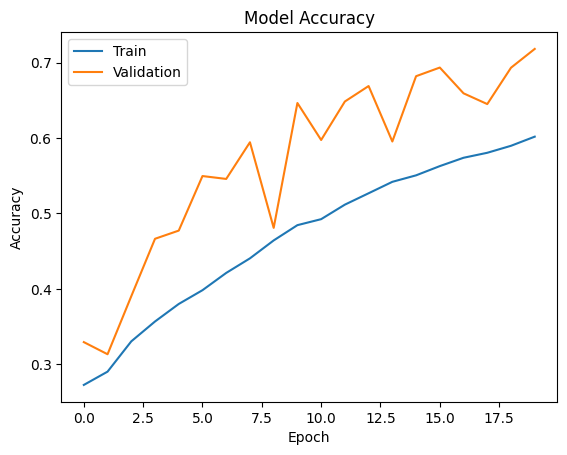

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
predictions = model.predict(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 


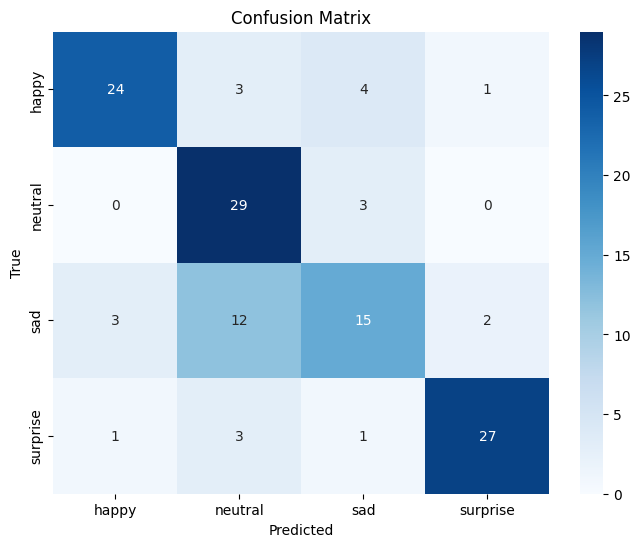

In [26]:
predicted_classes = np.argmax(predictions, axis=1)


true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())


cm = confusion_matrix(true_classes, predicted_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       happy       0.86      0.75      0.80        32
     neutral       0.62      0.91      0.73        32
         sad       0.65      0.47      0.55        32
    surprise       0.90      0.84      0.87        32

    accuracy                           0.74       128
   macro avg       0.76      0.74      0.74       128
weighted avg       0.76      0.74      0.74       128



### **Evaluating the Model on the Test Set**

In [28]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7542 - loss: 0.6592
Test Accuracy: 74.22%


**Observations and Insights:_1. The nodel is mediocare 74% overall but poor sad recall-47%-
2.the validation is bigger than the train because of the augmentation  _**

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [29]:
from tensorflow.keras import backend as K
K.clear_session()

In [30]:
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [31]:
#we need folder based loading:
batch_size  = 32
img_size = 48

#train with augmentation:
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=[0.8, 1.2], # not a large range of brightness- not to obscure key facial cues
                                    rescale=1./255,
                                    rotation_range=15,  # rotating the image bit- increse rovustnesss,  not too much, not to distort emotions
                                    width_shift_range=0.1,# face not in the center - right,left
                                    height_shift_range=0.1,# face not in the center - up, down
                                    zoom_range=0.1,
                                    shear_range=0.3)# maybe 0.2 or 0.1 is better?

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)# shuffle true for train

#validation and test without augmentation:
datagen_validation = ImageDataGenerator(
    rescale=1./255
)


validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for validation

datagen_test = ImageDataGenerator(
    rescale=1./255
)


test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for test


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [32]:

model = Sequential()

# 1st Convolution Block
model.add(Conv2D(32, (3, 3),activation='relu',padding = 'same', input_shape=(48, 48, 1)))
#model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution Block
model.add(Conv2D(64, (3, 3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution Block
model.add(Conv2D(128, (3, 3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 emotion classes
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,274,500 (4.86 MB)

 Trainable params: 1,274,052 (4.86 MB)

 Non-trainable params: 448 (1.75 KB)

### **Compiling and Training the Model**

In [33]:
# creating callbacks:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # Stop if no improvement after 5 epochs
    restore_best_weights=True
)



from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)




from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [34]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
history =   model.fit(
            train_set,
            validation_data= validation_set,
            epochs=30,
            shuffle=True,
            batch_size=32,
            verbose=1,
            callbacks=[early_stop, checkpoint, reduce_lr]
)


Epoch 1/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3164 - loss: 2.1802

473/473 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.3165 - loss: 2.1792 - val_accuracy: 0.4864 - val_loss: 1.3207 - learning_rate: 0.0010
Epoch 2/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4396 - loss: 1.2878

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.4397 - loss: 1.2876 - val_accuracy: 0.4244 - val_loss: 1.2250 - learning_rate: 0.0010
Epoch 3/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5080 - loss: 1.1239

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5080 - loss: 1.1239 - val_accuracy: 0.6010 - val_loss: 0.9486 - learning_rate: 0.0010
Epoch 4/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5403 - loss: 1.0563

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5403 - loss: 1.0563 - val_accuracy: 0.6251 - val_loss: 0.9107 - learning_rate: 0.0010
Epoch 5/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5625 - loss: 1.0177 - val_accuracy: 0.5421 - val_loss: 1.1363 - learning_rate: 0.0010
Epoch 6/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5724 - loss: 0.9915

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5725 - loss: 0.9914 - val_accuracy: 0.6618 - val_loss: 0.8331 - learning_rate: 0.0010
Epoch 7/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5971 - loss: 0.9496 - val_accuracy: 0.6307 - val_loss: 0.8868 - learning_rate: 0.0010
Epoch 8/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6074 - loss: 0.9276

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6074 - loss: 0.9276 - val_accuracy: 0.6803 - val_loss: 0.8125 - learning_rate: 0.0010
Epoch 9/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6172 - loss: 0.9124

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6172 - loss: 0.9124 - val_accuracy: 0.6741 - val_loss: 0.7996 - learning_rate: 0.0010
Epoch 10/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6199 - loss: 0.9007

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6199 - loss: 0.9008 - val_accuracy: 0.6850 - val_loss: 0.7661 - learning_rate: 0.0010
Epoch 11/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6180 - loss: 0.8953 - val_accuracy: 0.6878 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 12/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6273 - loss: 0.8896

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.6273 - loss: 0.8895 - val_accuracy: 0.6968 - val_loss: 0.7296 - learning_rate: 0.0010
Epoch 13/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6397 - loss: 0.8646 - val_accuracy: 0.6253 - val_loss: 0.8945 - learning_rate: 0.0010
Epoch 14/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6372 - loss: 0.8663 - val_accuracy: 0.6978 - val_loss: 0.7385 - learning_rate: 0.0010
Epoch 15/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6388 - loss: 0.8521

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6388 - loss: 0.8521 - val_accuracy: 0.7123 - val_loss: 0.7211 - learning_rate: 0.0010
Epoch 16/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6557 - loss: 0.8266

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6557 - loss: 0.8267 - val_accuracy: 0.7095 - val_loss: 0.7209 - learning_rate: 0.0010
Epoch 17/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6539 - loss: 0.8278

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6539 - loss: 0.8278 - val_accuracy: 0.7203 - val_loss: 0.7087 - learning_rate: 0.0010
Epoch 18/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6579 - loss: 0.8221 - val_accuracy: 0.6243 - val_loss: 0.9978 - learning_rate: 0.0010
Epoch 19/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6653 - loss: 0.8060

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.6653 - loss: 0.8060 - val_accuracy: 0.7121 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 20/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6499 - loss: 0.8342 - val_accuracy: 0.7203 - val_loss: 0.7125 - learning_rate: 0.0010
Epoch 21/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6581 - loss: 0.8077 - val_accuracy: 0.7113 - val_loss: 0.7446 - learning_rate: 0.0010
Epoch 22/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6644 - loss: 0.8063

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6645 - loss: 0.8063 - val_accuracy: 0.7358 - val_loss: 0.6884 - learning_rate: 0.0010
Epoch 23/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6713 - loss: 0.7951 - val_accuracy: 0.7071 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 24/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6733 - loss: 0.7799 - val_accuracy: 0.7300 - val_loss: 0.7257 - learning_rate: 0.0010
Epoch 25/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6706 - loss: 0.7843

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6706 - loss: 0.7843 - val_accuracy: 0.7314 - val_loss: 0.6645 - learning_rate: 0.0010
Epoch 26/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6765 - loss: 0.7861 - val_accuracy: 0.7290 - val_loss: 0.6816 - learning_rate: 0.0010
Epoch 27/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6748 - loss: 0.7993 - val_accuracy: 0.7131 - val_loss: 0.6982 - learning_rate: 0.0010
Epoch 28/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6710 - loss: 0.7877

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6710 - loss: 0.7876 - val_accuracy: 0.7412 - val_loss: 0.6565 - learning_rate: 0.0010
Epoch 29/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6866 - loss: 0.7686 - val_accuracy: 0.7384 - val_loss: 0.6593 - learning_rate: 0.0010
Epoch 30/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6856 - loss: 0.7655

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.6856 - loss: 0.7655 - val_accuracy: 0.7472 - val_loss: 0.6341 - learning_rate: 0.0010


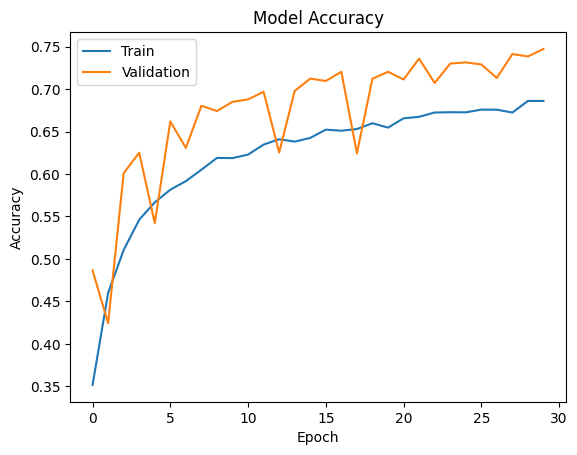

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
predictions = model.predict(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


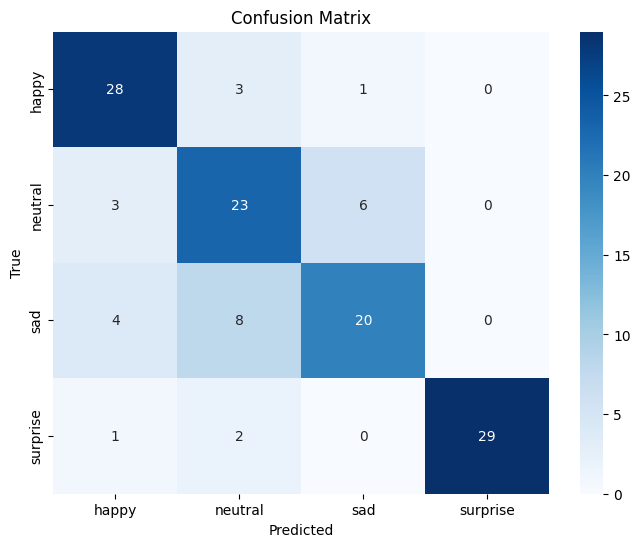

In [38]:

predicted_classes = np.argmax(predictions, axis=1)


true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())


cm = confusion_matrix(true_classes, predicted_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       happy       0.78      0.88      0.82        32
     neutral       0.64      0.72      0.68        32
         sad       0.74      0.62      0.68        32
    surprise       1.00      0.91      0.95        32

    accuracy                           0.78       128
   macro avg       0.79      0.78      0.78       128
weighted avg       0.79      0.78      0.78       128



### **Evaluating the Model on the Test Set**

In [40]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7948 - loss: 0.5484
Test Accuracy: 78.12%


**Observations and Insights:11._Much better performance ,78%,  larger than 74%, but there is a mismtch between sad and neutral
2. the rgb option did not improve the model-maybe because it is orignaly grayscale, or because color adds noise_**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [41]:
#clear and seed:
K.clear_session()

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)





## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [42]:
#we need folder based loading:
batch_size  = 16  # instead of 32, less heavy model
img_size = 224 # # instead of 244, less heavy model

#train with augmentation:
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=[0.8, 1.2], # not a large range of brightness- not to obscure key facial cues
                                    rescale=1./255,
                                    rotation_range=15,  # rotating the image bit- increse rovustnesss,  not too much, not to distort emotions
                                    width_shift_range=0.1,# face not in the center - right,left
                                    height_shift_range=0.1,# face not in the center - up, down
                                    zoom_range=0.1,
                                    shear_range=0.3)# maybe 0.2 or 0.1 is better?

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)# shuffle true for train

Found 15109 images belonging to 4 classes.


In [43]:
#validation and test without augmentation:
datagen_validation = ImageDataGenerator(
    rescale=1./255
)


validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = False)# no shuffle for validation

datagen_test = ImageDataGenerator(
    rescale=1./255
)


test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = False)# no shuffle for test


Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [44]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model


vgg = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [45]:
for layer in vgg.layers:
    layer.trainable = False

In [46]:
for layer in vgg.layers:
    print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [47]:
x = vgg.output
x = GlobalAveragePooling2D()(x)           # fewer parameters than faltten
x = Dense(256, activation='relu')(x)      # Fully connected layer
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # Final classification layer (for 4 emotions)

model = Model(inputs=vgg.input, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### **Compiling and Training the VGG16 Model**

In [48]:
# creating callbacks:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # Stop if no improvement after 5 epochs
    restore_best_weights=True
)



from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)




from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [49]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
history =   model.fit(
            train_set,
            validation_data= validation_set,
            epochs=20, # the model is pretrained so I don't need a lot of epoches
            shuffle=True,
            batch_size=16, # instead of 32 to make the model lighter
            verbose=1,
            callbacks=[early_stop, checkpoint, reduce_lr]
)


Epoch 1/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.3490 - loss: 1.3415

945/945 ━━━━━━━━━━━━━━━━━━━━ 193s 199ms/step - accuracy: 0.3490 - loss: 1.3414 - val_accuracy: 0.4414 - val_loss: 1.2112 - learning_rate: 0.0010
Epoch 2/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4405 - loss: 1.2140

945/945 ━━━━━━━━━━━━━━━━━━━━ 183s 193ms/step - accuracy: 0.4405 - loss: 1.2140 - val_accuracy: 0.5059 - val_loss: 1.1480 - learning_rate: 0.0010
Epoch 3/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 182s 193ms/step - accuracy: 0.4668 - loss: 1.1830 - val_accuracy: 0.4810 - val_loss: 1.1636 - learning_rate: 0.0010
Epoch 4/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4754 - loss: 1.1599

945/945 ━━━━━━━━━━━━━━━━━━━━ 182s 193ms/step - accuracy: 0.4754 - loss: 1.1599 - val_accuracy: 0.5292 - val_loss: 1.1006 - learning_rate: 0.0010
Epoch 5/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5019 - loss: 1.1318

945/945 ━━━━━━━━━━━━━━━━━━━━ 182s 193ms/step - accuracy: 0.5019 - loss: 1.1318 - val_accuracy: 0.5337 - val_loss: 1.0959 - learning_rate: 0.0010
Epoch 6/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4986 - loss: 1.1433

945/945 ━━━━━━━━━━━━━━━━━━━━ 182s 193ms/step - accuracy: 0.4986 - loss: 1.1433 - val_accuracy: 0.5168 - val_loss: 1.0882 - learning_rate: 0.0010
Epoch 7/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5070 - loss: 1.1182

945/945 ━━━━━━━━━━━━━━━━━━━━ 183s 193ms/step - accuracy: 0.5070 - loss: 1.1182 - val_accuracy: 0.5260 - val_loss: 1.0854 - learning_rate: 0.0010
Epoch 8/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5152 - loss: 1.1103

945/945 ━━━━━━━━━━━━━━━━━━━━ 184s 194ms/step - accuracy: 0.5152 - loss: 1.1103 - val_accuracy: 0.5489 - val_loss: 1.0516 - learning_rate: 0.0010
Epoch 9/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 185s 195ms/step - accuracy: 0.5192 - loss: 1.1090 - val_accuracy: 0.5232 - val_loss: 1.0998 - learning_rate: 0.0010
Epoch 10/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 183s 193ms/step - accuracy: 0.5069 - loss: 1.1084 - val_accuracy: 0.5441 - val_loss: 1.0581 - learning_rate: 0.0010
Epoch 11/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 185s 195ms/step - accuracy: 0.5207 - loss: 1.1023 - val_accuracy: 0.5278 - val_loss: 1.0850 - learning_rate: 0.0010
Epoch 12/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5389 - loss: 1.0703

945/945 ━━━━━━━━━━━━━━━━━━━━ 186s 196ms/step - accuracy: 0.5389 - loss: 1.0703 - val_accuracy: 0.5453 - val_loss: 1.0406 - learning_rate: 5.0000e-04
Epoch 13/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 186s 197ms/step - accuracy: 0.5370 - loss: 1.0767 - val_accuracy: 0.5517 - val_loss: 1.0435 - learning_rate: 5.0000e-04
Epoch 14/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 186s 196ms/step - accuracy: 0.5515 - loss: 1.0614 - val_accuracy: 0.5455 - val_loss: 1.0471 - learning_rate: 5.0000e-04
Epoch 15/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5489 - loss: 1.0627

945/945 ━━━━━━━━━━━━━━━━━━━━ 186s 197ms/step - accuracy: 0.5489 - loss: 1.0627 - val_accuracy: 0.5533 - val_loss: 1.0305 - learning_rate: 5.0000e-04
Epoch 16/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5413 - loss: 1.0594

945/945 ━━━━━━━━━━━━━━━━━━━━ 183s 194ms/step - accuracy: 0.5414 - loss: 1.0594 - val_accuracy: 0.5539 - val_loss: 1.0289 - learning_rate: 5.0000e-04
Epoch 17/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5570 - loss: 1.0542

945/945 ━━━━━━━━━━━━━━━━━━━━ 183s 193ms/step - accuracy: 0.5570 - loss: 1.0542 - val_accuracy: 0.5724 - val_loss: 1.0137 - learning_rate: 5.0000e-04
Epoch 18/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 183s 193ms/step - accuracy: 0.5452 - loss: 1.0538 - val_accuracy: 0.5467 - val_loss: 1.0569 - learning_rate: 5.0000e-04
Epoch 19/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 184s 194ms/step - accuracy: 0.5570 - loss: 1.0525 - val_accuracy: 0.5600 - val_loss: 1.0193 - learning_rate: 5.0000e-04
Epoch 20/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 182s 192ms/step - accuracy: 0.5568 - loss: 1.0503 - val_accuracy: 0.5622 - val_loss: 1.0177 - learning_rate: 5.0000e-04


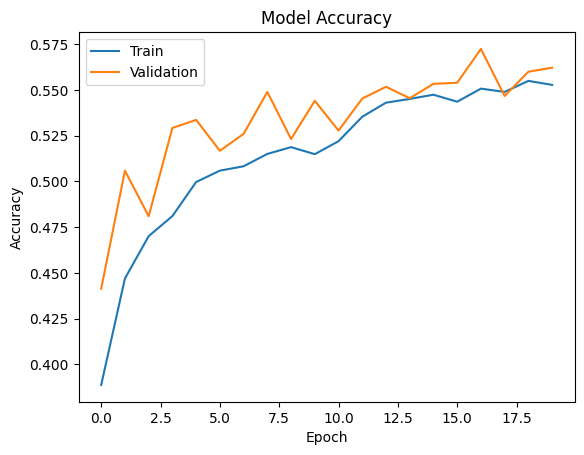

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
predictions = model.predict(test_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


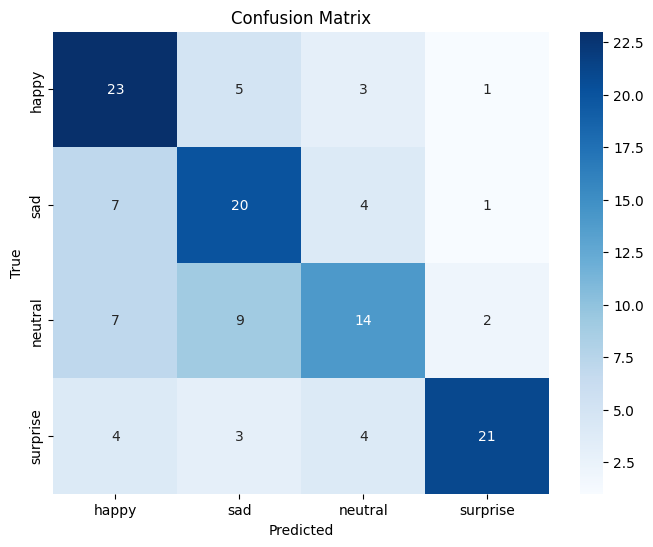

In [53]:

predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get true labels and class names
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Step 3: Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       happy       0.56      0.72      0.63        32
         sad       0.54      0.62      0.58        32
     neutral       0.56      0.44      0.49        32
    surprise       0.84      0.66      0.74        32

    accuracy                           0.61       128
   macro avg       0.63      0.61      0.61       128
weighted avg       0.63      0.61      0.61       128



### **Evaluating the VGG16 model**

In [55]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6395 - loss: 0.9254
Test Accuracy: 60.94%


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__overall accuracy not good - 61% is less tham 70%, but the challenging  sad recall is pretty good - 62%**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [56]:
#clear and seed:
from tensorflow.keras import backend as K
K.clear_session()

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [57]:
#data loaders -train
#we need folder based loading:
batch_size  = 32
img_size = 224

#train with augmentation:
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=[0.8, 1.2], # not a large range of brightness- not to obscure key facial cues
                                    rescale=1./255,
                                    rotation_range=15,  # rotating the image bit- increse rovustnesss,  not too much, not to distort emotions
                                    width_shift_range=0.1,# face not in the center - right,left
                                    height_shift_range=0.1,# face not in the center - up, down
                                    zoom_range=0.1,
                                    shear_range=0.3)# maybe 0.2 or 0.1 is better?

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)# shuffle true for train

Found 15109 images belonging to 4 classes.


In [58]:
#data loaders - validation and test without augmentation:
datagen_validation = ImageDataGenerator(
    rescale=1./255
)


validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for validation

datagen_test = ImageDataGenerator(
    rescale=1./255
)


test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for test


Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [59]:
from tensorflow.keras.models import Model
import tensorflow.keras.applications as ap
Resnet = ap.ResNet50(include_top = False, weights = "imagenet", input_shape=(224,224,3))   # resnet50 to make the model lighter with colab
Resnet.summary()



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [60]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False


In [61]:
x = GlobalAveragePooling2D()(Resnet.output)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)

from tensorflow.keras.models import Model

model = Model(inputs=Resnet.input, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,121,476 (92.02 MB)

 Trainable params: 529,668 (2.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

### **Compiling and Training the Model**

### **Evaluating the ResNet Model**

In [62]:

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # Stop if no improvement after 5 epochs
    restore_best_weights=True
)



from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)




from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [63]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [64]:
history =   model.fit(
            train_set,
            validation_data= validation_set,
            epochs=20, # the model is pretrained so I don't need a lot of epoches
            shuffle=True,
            batch_size=8,
            verbose=1,
            callbacks=[early_stop, checkpoint, reduce_lr]
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.3572 - loss: 1.4184

473/473 ━━━━━━━━━━━━━━━━━━━━ 202s 403ms/step - accuracy: 0.3572 - loss: 1.4183 - val_accuracy: 0.4362 - val_loss: 1.2548 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4003 - loss: 1.2890

473/473 ━━━━━━━━━━━━━━━━━━━━ 182s 384ms/step - accuracy: 0.4003 - loss: 1.2890 - val_accuracy: 0.4967 - val_loss: 1.1654 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.4241 - loss: 1.2661

473/473 ━━━━━━━━━━━━━━━━━━━━ 181s 383ms/step - accuracy: 0.4241 - loss: 1.2661 - val_accuracy: 0.5105 - val_loss: 1.1536 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 180s 381ms/step - accuracy: 0.4296 - loss: 1.2516 - val_accuracy: 0.4981 - val_loss: 1.1632 - learning_rate: 0.0010
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.4177 - loss: 1.2535

473/473 ━━━━━━━━━━━━━━━━━━━━ 183s 386ms/step - accuracy: 0.4177 - loss: 1.2535 - val_accuracy: 0.5220 - val_loss: 1.1360 - learning_rate: 0.0010
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.4206 - loss: 1.2599

473/473 ━━━━━━━━━━━━━━━━━━━━ 184s 389ms/step - accuracy: 0.4206 - loss: 1.2599 - val_accuracy: 0.5154 - val_loss: 1.1351 - learning_rate: 0.0010
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 183s 387ms/step - accuracy: 0.4358 - loss: 1.2440 - val_accuracy: 0.5017 - val_loss: 1.1474 - learning_rate: 0.0010
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.4303 - loss: 1.2496

473/473 ━━━━━━━━━━━━━━━━━━━━ 184s 389ms/step - accuracy: 0.4303 - loss: 1.2496 - val_accuracy: 0.5162 - val_loss: 1.1182 - learning_rate: 0.0010
Epoch 9/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 183s 387ms/step - accuracy: 0.4298 - loss: 1.2471 - val_accuracy: 0.5337 - val_loss: 1.1321 - learning_rate: 0.0010
Epoch 10/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4308 - loss: 1.2451

473/473 ━━━━━━━━━━━━━━━━━━━━ 182s 384ms/step - accuracy: 0.4308 - loss: 1.2451 - val_accuracy: 0.5401 - val_loss: 1.0988 - learning_rate: 0.0010
Epoch 11/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 180s 381ms/step - accuracy: 0.4316 - loss: 1.2558 - val_accuracy: 0.5264 - val_loss: 1.1251 - learning_rate: 0.0010
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 181s 383ms/step - accuracy: 0.4371 - loss: 1.2450 - val_accuracy: 0.5379 - val_loss: 1.1135 - learning_rate: 0.0010
Epoch 13/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 180s 381ms/step - accuracy: 0.4385 - loss: 1.2342 - val_accuracy: 0.5361 - val_loss: 1.1207 - learning_rate: 0.0010
Epoch 14/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 180s 382ms/step - accuracy: 0.4327 - loss: 1.2422 - val_accuracy: 0.5272 - val_loss: 1.1102 - learning_rate: 5.0000e-04
Epoch 15/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 180s 381ms/step - accuracy: 0.4398 - loss: 1.2341 - val_accuracy: 0.5234 - val_loss: 1.1072 - learning_rate: 5.0000e-04


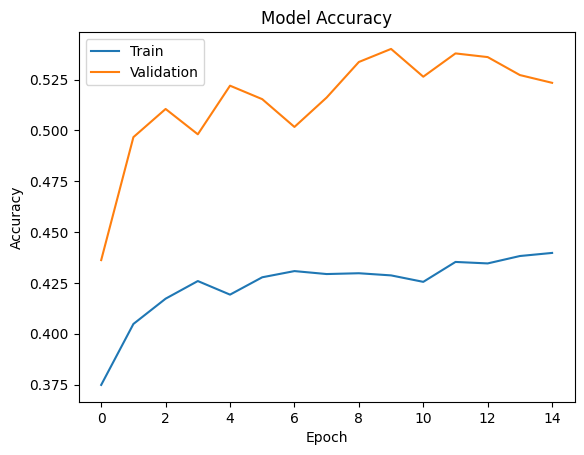

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [66]:
predictions = model.predict(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


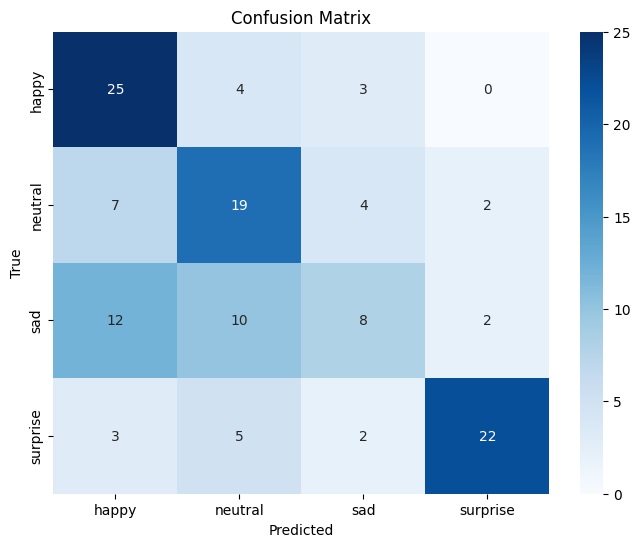

In [67]:
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get true labels and class names
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Step 3: Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [68]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       happy       0.53      0.78      0.63        32
     neutral       0.50      0.59      0.54        32
         sad       0.47      0.25      0.33        32
    surprise       0.85      0.69      0.76        32

    accuracy                           0.58       128
   macro avg       0.59      0.58      0.57       128
weighted avg       0.59      0.58      0.57       128



In [69]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6333 - loss: 1.0130
Test Accuracy: 57.81%


**Observations and Insights:_not a good model. overall acuuracy 58% and sad recall very bad - 25%_**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [70]:
#clear and seed:
K.clear_session()

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [71]:
#data loaders -train
#we need folder based loading:
batch_size  = 32
img_size = 224

#train with augmentation:
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=[0.8, 1.2], # not a large range of brightness- not to obscure key facial cues
                                    rescale=1./255,
                                    rotation_range=15,  # rotating the image bit- increse rovustnesss,  not too much, not to distort emotions
                                    width_shift_range=0.1,# face not in the center - right,left
                                    height_shift_range=0.1,# face not in the center - up, down
                                    zoom_range=0.1,
                                    shear_range=0.3)# maybe 0.2 or 0.1 is better?

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)# shuffle true for train

Found 15109 images belonging to 4 classes.


In [72]:
#data loaders - validation and test without augmentation:
datagen_validation = ImageDataGenerator(
    rescale=1./255
)


validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for validation

datagen_test = ImageDataGenerator(
    rescale=1./255
)


test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode ='rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for test

Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [73]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import Model
# ===  MODEL ===
model = EfficientNetV2B2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Use 'block6e_expand_activation' as the transfer output
transfer_layer = model.get_layer('block6e_expand_activation').output

# === CUSTOM HEAD ===
x = GlobalAveragePooling2D()(transfer_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(4, activation='softmax')(x)  # assuming 4 emotion classes

# === MODEL ===
model = Model(inputs=model.input, outputs=output_layer)

# Freeze base
model.trainable = False

35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### **Compiling and Training the Model**

In [74]:

# CALLBACKS:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# === COMPILE ===
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === TRAIN ===
history = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=10,
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)

Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.2541 - loss: 1.4087
Epoch 1: val_loss improved from inf to 1.40506, saving model to best_model.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 231s 443ms/step - accuracy: 0.2541 - loss: 1.4087 - val_accuracy: 0.2443 - val_loss: 1.4051 - learning_rate: 0.0010
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.2533 - loss: 1.4069
Epoch 2: val_loss did not improve from 1.40506
473/473 ━━━━━━━━━━━━━━━━━━━━ 183s 387ms/step - accuracy: 0.2533 - loss: 1.4069 - val_accuracy: 0.2443 - val_loss: 1.4051 - learning_rate: 0.0010
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.2572 - loss: 1.4064
Epoch 3: val_loss did not improve from 1.40506
473/473 ━━━━━━━━━━━━━━━━━━━━ 183s 387ms/step - accuracy: 0.2572 - loss: 1.4064 - val_accuracy: 0.2443 - val_loss: 1.4051 - learning_rate: 0.0010
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.2520 - loss: 1.4095
Epoch 4: val_loss did not improve from 1.40506

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
473/473 ━━━━━━━━━━━━━━━━━━━━ 185s 390ms/step - accuracy: 0.2520 - loss: 1.4095 - va

### **Evaluating the EfficientnetNet Model**

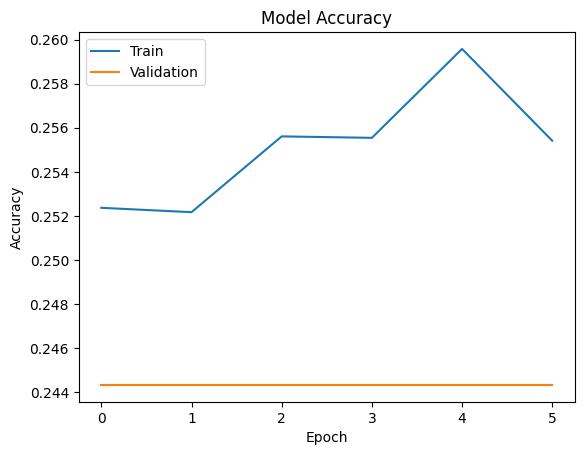

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [76]:
predictions = model.predict(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step


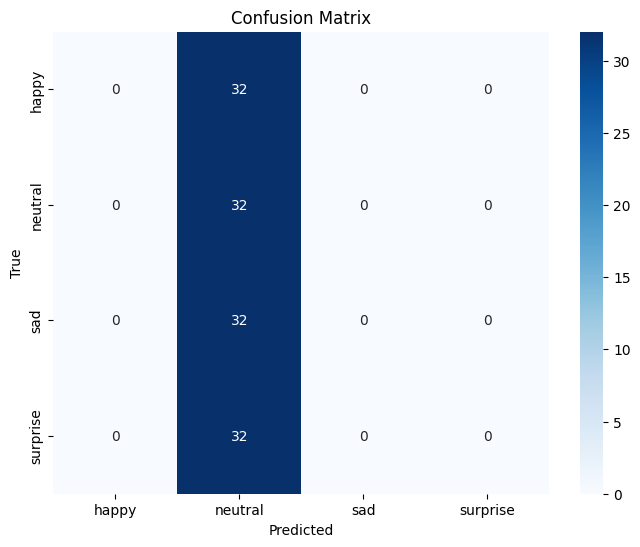

In [77]:
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get true labels and class names
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Step 3: Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [78]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       happy       0.00      0.00      0.00        32
     neutral       0.25      1.00      0.40        32
         sad       0.00      0.00      0.00        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



In [79]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2667 - loss: 1.4061
Test Accuracy: 25.00%


**Observations and Insights:_the model did not work. predicted all as neutral
**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [80]:
from tensorflow.keras import backend as K
K.clear_session()

In [81]:
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [82]:
#we need folder based loading:
batch_size  = 32
img_size = 48

#train with augmentation:
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=[0.8, 1.2], # not a large range of brightness- not to obscure key facial cues
                                    rescale=1./255,
                                    rotation_range=15,  # rotating the image bit- increse rovustnesss,  not too much, not to distort emotions
                                    width_shift_range=0.1,# face not in the center - right,left
                                    height_shift_range=0.1,# face not in the center - up, down
                                    zoom_range=0.1,
                                    shear_range=0.3)# maybe 0.2 or 0.1 is better?

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)# shuffle true for train

#validation and test without augmentation:
datagen_validation = ImageDataGenerator(
    rescale=1./255
)


validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for validation

datagen_test = ImageDataGenerator(
    rescale=1./255
)


test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)# no shuffle for test

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [83]:

model = Sequential()

# 1st Convolution Block
model.add(Conv2D(32, (3, 3),padding = 'same', input_shape=(48, 48, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution Block
model.add(Conv2D(64, (3, 3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution Block
model.add(Conv2D(128, (3, 3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4rd Convolution Block
model.add(Conv2D(256, (3, 3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# 5rd Convolution Block
model.add(Conv2D(512, (3, 3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))




# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 emotion classes
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 512)      │         2,04

 Total params: 1,704,324 (6.50 MB)

 Trainable params: 1,702,340 (6.49 MB)

 Non-trainable params: 1,984 (7.75 KB)

### **Compiling and Training the Model**

In [84]:



from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # Stop if no improvement after 5 epochs
    restore_best_weights=True
)



from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)




from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [85]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [86]:
history =   model.fit(
            train_set,
            validation_data= validation_set,
            epochs=30,
            shuffle=True,
            batch_size=32,
            verbose=1,
            callbacks=[early_stop, checkpoint, reduce_lr]
)


Epoch 1/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3054 - loss: 1.7682

473/473 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.3055 - loss: 1.7669 - val_accuracy: 0.3570 - val_loss: 1.3767 - learning_rate: 0.0010
Epoch 2/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4307 - loss: 1.2289

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.4308 - loss: 1.2288 - val_accuracy: 0.5875 - val_loss: 0.9490 - learning_rate: 0.0010
Epoch 3/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5206 - loss: 1.0711

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5207 - loss: 1.0711 - val_accuracy: 0.6056 - val_loss: 0.9061 - learning_rate: 0.0010
Epoch 4/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5725 - loss: 0.9878

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.5726 - loss: 0.9877 - val_accuracy: 0.6825 - val_loss: 0.7698 - learning_rate: 0.0010
Epoch 5/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6022 - loss: 0.9420 - val_accuracy: 0.6550 - val_loss: 0.8446 - learning_rate: 0.0010
Epoch 6/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6185 - loss: 0.9058

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6185 - loss: 0.9058 - val_accuracy: 0.6860 - val_loss: 0.7695 - learning_rate: 0.0010
Epoch 7/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6370 - loss: 0.8689 - val_accuracy: 0.6355 - val_loss: 0.8685 - learning_rate: 0.0010
Epoch 8/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6454 - loss: 0.8519

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6454 - loss: 0.8519 - val_accuracy: 0.6906 - val_loss: 0.7655 - learning_rate: 0.0010
Epoch 9/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6478 - loss: 0.8340

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6478 - loss: 0.8340 - val_accuracy: 0.6876 - val_loss: 0.7515 - learning_rate: 0.0010
Epoch 10/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6549 - loss: 0.8227 - val_accuracy: 0.6568 - val_loss: 0.8233 - learning_rate: 0.0010
Epoch 11/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6652 - loss: 0.8063 - val_accuracy: 0.6659 - val_loss: 0.8457 - learning_rate: 0.0010
Epoch 12/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6724 - loss: 0.7944

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6724 - loss: 0.7944 - val_accuracy: 0.7312 - val_loss: 0.6759 - learning_rate: 0.0010
Epoch 13/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6708 - loss: 0.7885 - val_accuracy: 0.6940 - val_loss: 0.7580 - learning_rate: 0.0010
Epoch 14/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6776 - loss: 0.7892

473/473 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6776 - loss: 0.7892 - val_accuracy: 0.7384 - val_loss: 0.6514 - learning_rate: 0.0010
Epoch 15/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6873 - loss: 0.7617 - val_accuracy: 0.7079 - val_loss: 0.6959 - learning_rate: 0.0010
Epoch 16/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6842 - loss: 0.7576

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6842 - loss: 0.7576 - val_accuracy: 0.7492 - val_loss: 0.6358 - learning_rate: 0.0010
Epoch 17/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6992 - loss: 0.7406 - val_accuracy: 0.7316 - val_loss: 0.6759 - learning_rate: 0.0010
Epoch 18/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6951 - loss: 0.7454 - val_accuracy: 0.7312 - val_loss: 0.6797 - learning_rate: 0.0010
Epoch 19/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7000 - loss: 0.7290 - val_accuracy: 0.7523 - val_loss: 0.6401 - learning_rate: 0.0010
Epoch 20/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7114 - loss: 0.7059

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7114 - loss: 0.7059 - val_accuracy: 0.7490 - val_loss: 0.6320 - learning_rate: 5.0000e-04
Epoch 21/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7206 - loss: 0.6914 - val_accuracy: 0.7338 - val_loss: 0.6797 - learning_rate: 5.0000e-04
Epoch 22/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7186 - loss: 0.6868

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7186 - loss: 0.6868 - val_accuracy: 0.7619 - val_loss: 0.6119 - learning_rate: 5.0000e-04
Epoch 23/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7157 - loss: 0.6798

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7157 - loss: 0.6799 - val_accuracy: 0.7593 - val_loss: 0.6031 - learning_rate: 5.0000e-04
Epoch 24/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7302 - loss: 0.6554 - val_accuracy: 0.7496 - val_loss: 0.6373 - learning_rate: 5.0000e-04
Epoch 25/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7274 - loss: 0.6669 - val_accuracy: 0.7555 - val_loss: 0.6282 - learning_rate: 5.0000e-04
Epoch 26/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7323 - loss: 0.6588 - val_accuracy: 0.7587 - val_loss: 0.6107 - learning_rate: 5.0000e-04
Epoch 27/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7326 - loss: 0.6557 - val_accuracy: 0.7547 - val_loss: 0.6346 - learning_rate: 2.5000e-04
Epoch 28/30
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7348 - loss: 0.6480

473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.7348 - loss: 0.6480 - val_accuracy: 0.7720 - val_loss: 0.5873 - learning_rate: 2.5000e-04
Epoch 29/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7341 - loss: 0.6453 - val_accuracy: 0.7643 - val_loss: 0.5982 - learning_rate: 2.5000e-04
Epoch 30/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7402 - loss: 0.6367 - val_accuracy: 0.7697 - val_loss: 0.5882 - learning_rate: 2.5000e-04


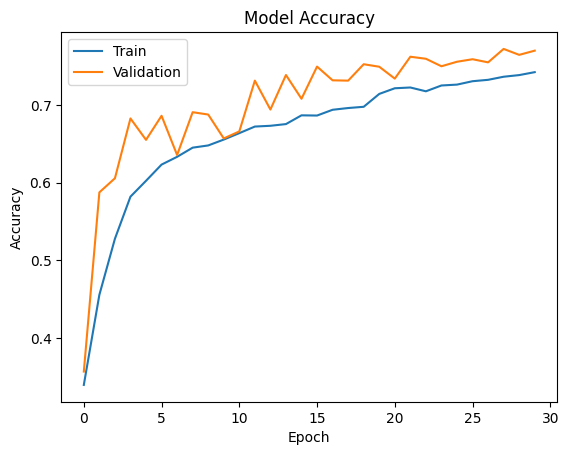

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [88]:
predictions = model.predict(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step  


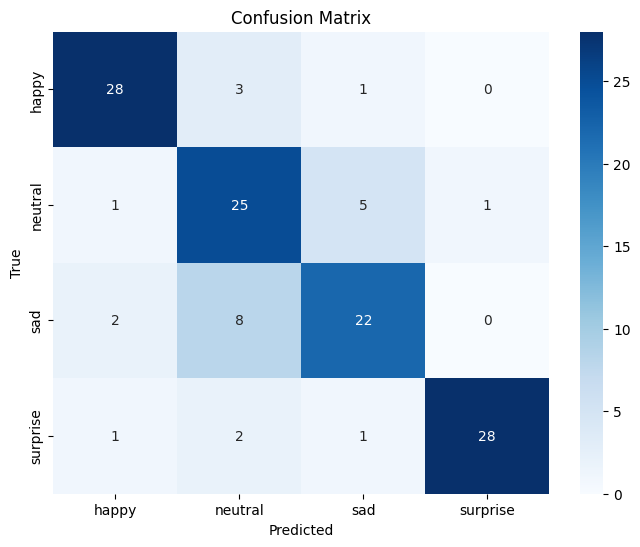

In [89]:
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get true labels and class names
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Step 3: Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [90]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       happy       0.88      0.88      0.88        32
     neutral       0.66      0.78      0.71        32
         sad       0.76      0.69      0.72        32
    surprise       0.97      0.88      0.92        32

    accuracy                           0.80       128
   macro avg       0.81      0.80      0.81       128
weighted avg       0.81      0.80      0.81       128



### **Evaluating the Model on Test Set**

In [91]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8188 - loss: 0.4842
Test Accuracy: 80.47%


 **Observations and Insights: this is ny best model with test accuracy of 82%, a little more the the second CNN model of 78% for overall accuracy, but mucl better in sad recall - 7% more!.
 _**

### **Plotting the Confusion Matrix for the chosen final model**

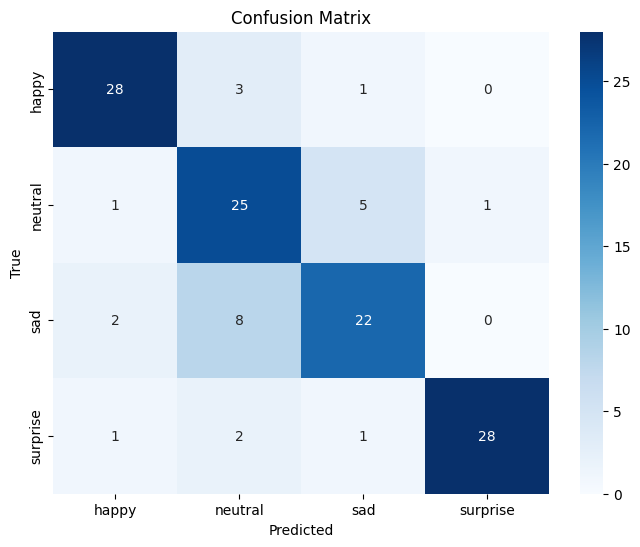

In [92]:

predicted_classes = np.argmax(predictions, axis=1)


true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())


cm = confusion_matrix(true_classes, predicted_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [93]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       happy       0.88      0.88      0.88        32
     neutral       0.66      0.78      0.71        32
         sad       0.76      0.69      0.72        32
    surprise       0.97      0.88      0.92        32

    accuracy                           0.80       128
   macro avg       0.81      0.80      0.81       128
weighted avg       0.81      0.80      0.81       128



In [94]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8188 - loss: 0.4842
Test Accuracy: 80.47%


**Observations and Insights:_the complex CNN got the best results in terms of F1 score and sad recall - 82%, 69% . it is still hard to distinguish between sad and neutral but it is much better than the other models_**

[link text](https://)## **Conclusion:__1. the best model is the complexed CNN with grayscale- although there is still confusion between sad and neutral__
2. the transfers__showed weaker preformances
3. _One reason, maybe because the original data is grayscale
4. another option, that color makes noise. and it gets harder to analyse the shapes, rinckles, shades, etc
5. maybe if for example, someone is embarrassed and blushing, the color red becomes important_
6.maybe it is a problem that the transfer models are trained on rgb and ther is a mismatch with grayscale__**
7. Maybe there is an effective way  to combine the transfer with grayscale that will outpreform the complexed CNN model

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
         1.RGB CNN models did not improve the performance
      2.CNN Models got better results  than with transfer learning architecture
      3. data augmentation had a major positive impact on the performance, especcialy bacause we have small dataset and    
        considering the comlexity of human iamges
       4.Larger rate of dropout after flatten than in the convolution blocks received better accuracy

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

     1. data augmentation had a major positive impact on the performance, especially bacause of a small data set like ours and    
           considering the comlexity of human iamges
        2. compliling - using val_loss function showed better performance than accuracy. In addition, it help me to assess             
           diferent parameter, since it is a continuous founction
        3. kernel size of 3 gave me the best results, much better than size 2 , since it cuptures bigger area of human face   
           with patterns and edges.
        4. The dense layers structure that I used for my CNN models and gave me good results, are not neccessarily the best    
           option for the transfer models. I tried several differnt structures in order to improve scores of my transfer  
           models
        5.My VGG16 model got better results than ResNet - especially when comparing sad recall
        6.  In my transfer models i used GlobalAveragePooling2D instead of flatten in order to make the models lighter
        7. My EfficientNet model failed. It predicted all the images as 'Neutral'
        8. my best model is complex cnn with 5 conv layers compared to only three in th second CNN.
          My second CNN showed better results than the base CNN thanks to larger dense after flatten - 256 vs 128

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
        I chose the Complex Neural Network model for the following reasons:
      1. Best accuracy - 82%, 4% more than the second highest which is the second CNN model  (78%).
      2. Best recall of 'sad' class (69%) which is very important in mental health, because we don't want to miss anxiety or   
          depression. it is 7% more than the next best (62%)
       This choice means more costs because there are 5 conv layers in comparison to the next best model (CNN 2) with only 3  
       conv layers.
       In my opinion, the extra cost worth it because the health industry requires high rate of accuracy ,the business will   
       enjoy a competitive advantage,and the benefit
       of helping patients who suffer from mental health issues is of paramount importance. We can sell the product as a layer for an existing Teletherapy platform.
       In terms of costs and benefits, I chose the complex convloutional model over the second CNN because of the much higher rate of sad recall. otherwise, adding 2 more conv block ,which means more costs in terms of gpu, paid clowd,memory,inference time', would not worth the extra 4% differnce in overall acuuracy   
       4.recommendations for the future: There is a concern that patients will not accept being filmed during sessions which are naturally very descreet  
           and sensitive so we need to o obtain all the appropriate legal approvals and develop informed consent templates for recording or analyzing patient video
            
            
            In addition, in the future, we can try to sell the product directly to therapists and institutes and provide premium, options like  dashboards, summaries, recommendations and more classes analysis.
          Another main challenge:We will need to invest in the future In distinguishing between sad and neutral.